## Monte Carlo Simulations of Avacado Demand

In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

sns.set_style('whitegrid')

In [64]:
df = pd.read_csv("/home/pinkmonkey/Downloads/Kaggle_datasets/Avacado/avocado.csv")
df = df.drop(['4046','4225','4770','Total Bags','Small Bags', 'Large Bags', 'XLarge Bags','type', 'year', 'region'], axis=1)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume
0,0,2015-12-27,1.33,64236.62
1,1,2015-12-20,1.35,54876.98
2,2,2015-12-13,0.93,118220.22
3,3,2015-12-06,1.08,78992.15
4,4,2015-11-29,1.28,51039.60


In [65]:
print(df.shape)

(18249, 4)


In [66]:
df['Demand'] = df['AveragePrice'] * df['Total Volume']

In [67]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,Demand
0,0,2015-12-27,1.33,64236.62,85434.7046
1,1,2015-12-20,1.35,54876.98,74083.9230
2,2,2015-12-13,0.93,118220.22,109944.8046
3,3,2015-12-06,1.08,78992.15,85311.5220
4,4,2015-11-29,1.28,51039.60,65330.6880


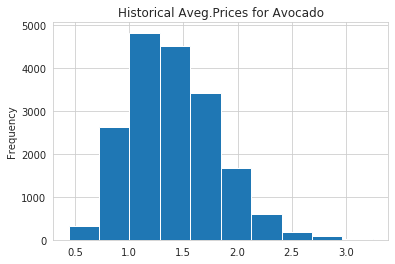

In [68]:
# Simple histogram to confirm distribution 
df['AveragePrice'].plot(kind='hist', title='Historical Aveg.Prices for Avocado');

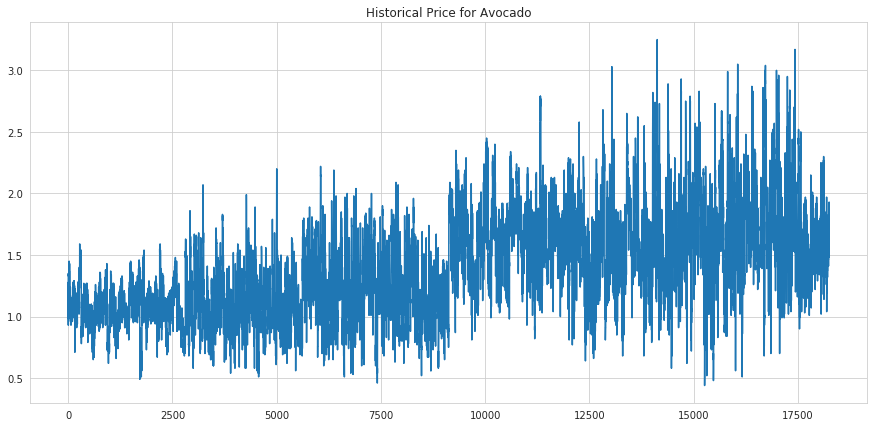

In [74]:
# Plot Aveg Price dynamics
df['AveragePrice'].plot(kind='line', title='Historical Price for Avocado',figsize = (15,7));

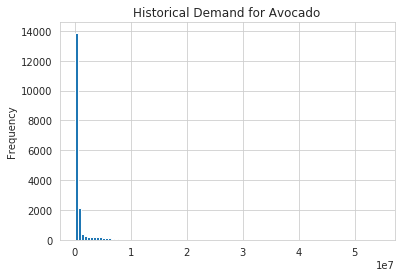

In [69]:
# Simple histogram to confirm distribution 
df['Demand'].plot(kind='hist', title='Historical Demand for Avocado', bins=100);

In [70]:
df['Demand'].describe()

count    1.824900e+04
mean     9.279484e+05
std      3.686048e+06
min      1.344504e+02
25%      1.716418e+04
50%      1.395298e+05
75%      5.141914e+05
max      5.437991e+07
Name: Demand, dtype: float64

#### Removing outliers 

(18249, 5)


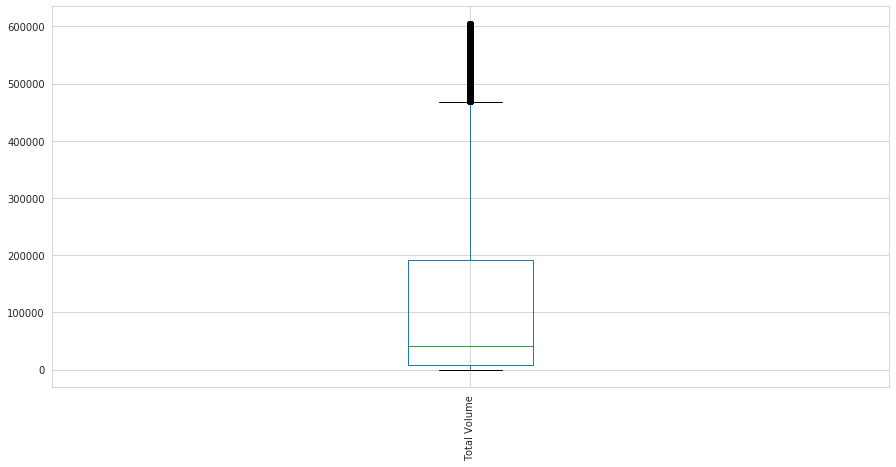

In [71]:
q = df["Total Volume"].quantile(0.8)
dfwo = df[df["Total Volume"] < q]
print(df.shape)
dfwo.boxplot('Total Volume',figsize = (15,7), rot=90);

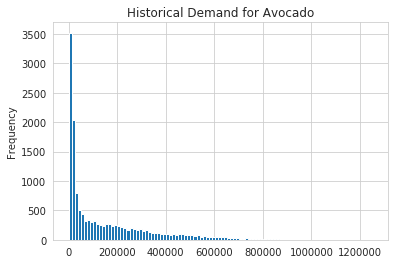

In [72]:
# Simple histogram to confirm distribution 
dfwo['Demand'].plot(kind='hist', title='Historical Demand for Avocado', bins=100);

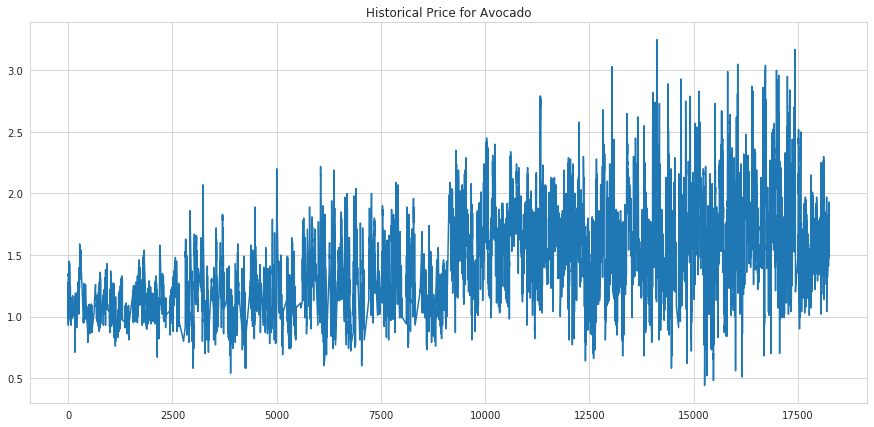

In [75]:
# Plot Aveg Price dynamics
dfwo['AveragePrice']

In [76]:
dfwo.corr()

,Unnamed: 0,AveragePrice,Total Volume,Demand
Unnamed: 0,1.000000,-0.124343,-0.008685,-0.045476
AveragePrice,-0.124343,1.000000,-0.456627,-0.315522
Total Volume,-0.008685,-0.456627,1.000000,0.961083
Demand,-0.045476,-0.315522,0.961083,1.000000


In [77]:
dfwo.describe()

,Unnamed: 0,AveragePrice,Total Volume,Demand
count,14599.000000,14599.000000,14599.000000,1.459900e+04
mean,24.025481,1.483252,119938.208683,1.511111e+05
std,15.463423,0.390270,150326.482271,1.870388e+05
min,0.000000,0.440000,84.560000,1.344504e+02
25%,10.000000,1.180000,8168.550000,1.311747e+04
50%,23.000000,1.450000,42131.800000,6.286172e+04
75%,38.000000,1.730000,192404.645000,2.356188e+05
max,52.000000,3.250000,604758.680000,1.254320e+06


In [93]:
avg = dfwo['AveragePrice'].mean()
std_p = dfwo['AveragePrice'].std()

In [94]:
num_reps = 365
num_simulations = 1000

In [97]:
price_sim = np.random.normal(avg, std_p, num_reps).round(2)

In [98]:
price_sim[0:10]

array([1.43, 1.55, 1.78, 1.3 , 1.21, 1.66, 0.9 , 1.63, 0.81, 1.1 ])

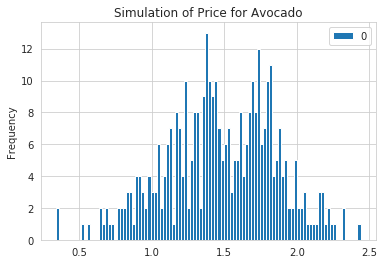

In [100]:
# Simple histogram to confirm distribution 
price_sim1 = pd.DataFrame(price_sim)
price_sim1.plot(kind='hist', title='Simulation of Price for Avocado', bins=100);